In [1]:
import os
import pandas as pd
import numpy as np

drivers_df = pd.read_csv('F1KaggleData/drivers.csv')
races_df = pd.read_csv('F1KaggleData/races.csv')
circuits_df = pd.read_csv('F1KaggleData/circuits.csv')
results_df = pd.read_csv('F1KaggleData/results.csv')

In [13]:
# display(drivers_df.head(5))
display(races_df.head(5))
# display(circuits_df.head(5))
display(results_df.head(5))

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


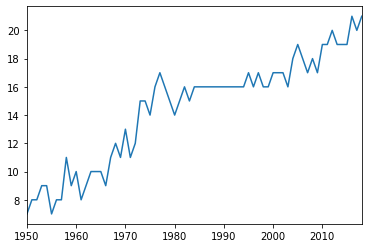

In [12]:
# races per season?
races_per_season = races_df.year.value_counts()
races_per_season.sort_index(inplace=True)
# display(type(races_per_season))
races_per_season.plot()

Now lets try to assess how many different drivers won per season, perhaps adjusted for the number of races 

In [17]:
import copy

wins = copy.copy(results_df.loc[results_df['position'] == 1.0])

wins.sort_values('raceId', inplace=True)

display(wins)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
7553,7554,1,18,23,22.0,1,1.0,1,1,10.0,58,34:15.8,5655784.0,17.0,3.0,01:28.0,216.891,1
7573,7574,2,18,23,22.0,1,1.0,1,1,5.0,31,10:52.1,4252092.0,18.0,1.0,01:36.6,206.483,1
7593,7594,3,20,9,15.0,1,1.0,1,1,10.0,56,57:43.5,7063485.0,42.0,2.0,01:52.6,174.235,1
7613,7614,4,18,23,22.0,4,1.0,1,1,10.0,57,31:48.2,5508182.0,11.0,3.0,01:34.6,205.979,1
7633,7634,5,18,23,22.0,1,1.0,1,1,10.0,66,37:19.2,5839202.0,17.0,2.0,01:22.9,202.149,1
7653,7654,6,18,23,22.0,1,1.0,1,1,10.0,78,40:44.3,6044282.0,49.0,2.0,01:15.2,159.914,1
7673,7674,7,18,23,22.0,2,1.0,1,1,10.0,58,26:24.8,5184848.0,40.0,1.0,01:27.6,219.422,1
7693,7694,8,20,9,15.0,1,1.0,1,1,10.0,60,22:49.3,4969328.0,16.0,1.0,01:20.7,229.238,1
7713,7714,9,17,9,14.0,1,1.0,1,1,10.0,60,36:43.3,5803310.0,37.0,3.0,01:34.0,197.151,1
7733,7734,10,1,1,1.0,4,1.0,1,1,10.0,70,38:23.9,5903876.0,16.0,4.0,01:22.5,191.219,1
